# Simulasi Monte Carlo Pada Mesin Pencetak Buku

By Alvian Damar

## Import Library

In [60]:
import random as r
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

## Flowchart Proses Pembuatan Buku

![Flowchart PPembuatan Buku.drawio.png](<attachment:Flowchart PPembuatan Buku.drawio.png>)
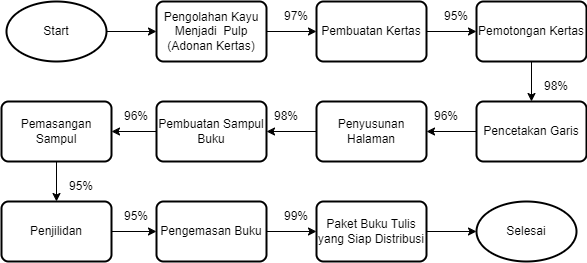

## Fungsi Simulasi

In [61]:
def simulasi(jumlah) :
    r.seed(224014)

    prob = {
        "Pembuatan Pulp" : 0.97,
        "Pembuatan Kertas" : 0.95,
        "Pemotongan Kertas" : 0.98,
        "Pencetakan Garis" : 0.96,
        "Penyusunan Halaman" : 0.98,
        "Pembuatan Sampul" : 0.96,
        "Pemasangan Sampul" : 0.95,
        "Penjilidan" : 0.95,
        "Pengemasan Buku" : 0.99
    }

    hasil = {}

    hasil["Pembuatan Pulp"] = [prob["Pembuatan Pulp"],[]]
    for i in range(1,jumlah+1) :
        if r.randint(1,100) <= prob["Pembuatan Pulp"]*100 :
            hasil["Pembuatan Pulp"][1].append(i)

    key = list(prob.keys())

    for j in range(len(key)-1) :
        hasil[key[j+1]] = [hasil[key[j]][0]*prob[key[j+1]],[]]
        for i in hasil[key[j]][1] :
            if r.randint(1,100) <= prob[key[j+1]]*100 :
                hasil[key[j+1]][1].append(i)

    return hasil
        




## Fungsi Visualisasi

In [62]:
def visualisasi(hasil, jumlah):
    proses = list(hasil.keys())

    p_teori = [hasil[k][0] for k in proses]
    p_sim = [len(hasil[k][1]) / jumlah for k in proses]

    x = range(len(proses))
    width = 0.35

    plt.figure(figsize=(12, 6))

    plt.bar(x, p_teori, width=width, label="Probabilitas Teoritis")
    plt.bar([i + width for i in x], p_sim, width=width, label="Probabilitas Simulasi")

    plt.xticks([i + width/2 for i in x], proses, rotation=45, ha="right")
    plt.ylabel("Probabilitas")
    plt.xlabel("Proses")
    plt.title("Perbandingan Probabilitas Teoritis vs Simulasi")
    plt.legend()

    plt.tight_layout()
    plt.show()

## Visualisasi Simulasi

In [63]:
@interact(Jumlah=IntSlider(min=100, max=10000, step=100))
def simulasi_interaktif(Jumlah):
  hasil = simulasi(Jumlah)
  visualisasi(hasil,Jumlah)
  


interactive(children=(IntSlider(value=100, description='Jumlah', max=10000, min=100, step=100), Output()), _do…